In [4]:
import pandas as pd
import numpy as np

In [ ]:
sp = pd.read_csv('./data/seoul_2020.csv')

In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83155 entries, 0 to 83154
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   실거래가아이디  83155 non-null  object 
 1   지번코드     83155 non-null  object 
 2   시군구코드    83155 non-null  int64  
 3   자치구명     83155 non-null  object 
 4   법정동코드    83155 non-null  int64  
 5   법정동명     83155 non-null  object 
 6   신고년도     83155 non-null  int64  
 7   업무구분코드   83155 non-null  int64  
 8   업무구분     83155 non-null  object 
 9   물건번호     83155 non-null  int64  
 10  대지권면적    83155 non-null  float64
 11  건물면적     83155 non-null  float64
 12  관리구분코드   83155 non-null  object 
 13  층정보      77063 non-null  float64
 14  건물주용도코드  83155 non-null  int64  
 15  건물주용도    83155 non-null  object 
 16  물건금액     83155 non-null  int64  
 17  건축년도     83041 non-null  float64
 18  건물명      77063 non-null  object 
dtypes: float64(4), int64(7), object(8)
memory usage: 12.1+ MB


In [7]:
sp.head()

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11110-2020-4-0001489-1,1111017500101790012,11110,종로구,1111017500,숭인동,2020,4,신고,1,31.82,72.16,0,1.0,2002,연립주택,200000000,2003.0,카라하우스
1,11110-2020-4-0001490-1,1111017500101790012,11110,종로구,1111017500,숭인동,2020,4,신고,1,17.26,39.15,0,2.0,2002,연립주택,119000000,2003.0,카라하우스
2,11110-2020-4-0001450-1,1111017100100040000,11110,종로구,1111017100,명륜2가,2020,4,신고,1,0.00,84.90,0,12.0,2001,아파트,890000000,1995.0,아남1
3,11110-2020-4-0001541-1,1111017400106390050,11110,종로구,1111017400,창신동,2020,4,신고,1,0.00,59.22,0,2.0,2001,아파트,330000000,1999.0,덕산
4,11110-2020-4-0001491-1,1111017500101790012,11110,종로구,1111017500,숭인동,2020,4,신고,1,18.39,41.71,0,2.0,2002,연립주택,127000000,2003.0,카라하우스


In [10]:
sp = sp.drop(['지번코드','시군구코드','실거래가아이디','법정동코드','신고년도','업무구분코드','업무구분','물건번호','대지권면적','관리구분코드','건물주용도코드'], axis='columns')

In [35]:
sp = sp.rename(columns = {'자치구명':'City','용도' : 'Principal Use', '면적' : 'Area', '층' : 'Floor', '실거래가' : 'Price','건물명':'Name'})

In [36]:
sp.head()

,City,법정동명,Area,Floor,Principal Use,Price,건축년도,Name
0,Jongro,숭인동,72.16,1.0,연립주택,200000000,2003.0,카라하우스
1,Jongro,숭인동,39.15,2.0,연립주택,119000000,2003.0,카라하우스
2,Jongro,명륜2가,84.90,12.0,아파트,890000000,1995.0,아남1
3,Jongro,창신동,59.22,2.0,아파트,330000000,1999.0,덕산
4,Jongro,숭인동,41.71,2.0,연립주택,127000000,2003.0,카라하우스


In [14]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83155 entries, 0 to 83154
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구명    83155 non-null  object 
 1   법정동명    83155 non-null  object 
 2   면적      83155 non-null  float64
 3   층       77063 non-null  float64
 4   용도      83155 non-null  object 
 5   실거래가    83155 non-null  int64  
 6   건축년도    83041 non-null  float64
 7   건물명     77063 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 5.1+ MB


In [15]:
sp.mean()

면적      7.125701e+01
층       6.777883e+00
실거래가    5.763515e+08
건축년도    1.987623e+03
dtype: float64

In [37]:
# 호환성 문제로 영문으로 rename
sp.loc[sp['City']=='송파구','City'] = 'Songpa'
sp.loc[sp['City']=='종로구','City'] = 'Jongro'
sp.loc[sp['City']=='강남구','City'] = 'Gangnam'
sp.loc[sp['City']=='강동구','City'] = 'Gangdong'
sp.loc[sp['City']=='서초구','City'] = 'Seocho'
sp.loc[sp['City']=='동작구','City'] = 'Dongjak'
sp.loc[sp['City']=='관악구','City'] = 'Gwanak'
sp.loc[sp['City']=='영등포구','City'] = 'Ydp'
sp.loc[sp['City']=='금천구','City'] = 'Geumcheon'
sp.loc[sp['City']=='구로구','City'] = 'Guro'
sp.loc[sp['City']=='양천구','City'] = 'Yangcheon'
sp.loc[sp['City']=='강서구','City'] = 'Gangseo'
sp.loc[sp['City']=='광진구','City'] = 'Gwangjin'
sp.loc[sp['City']=='성동구','City'] = 'Seongdong'
sp.loc[sp['City']=='용산구','City'] = 'Yongsan'
sp.loc[sp['City']=='중구','City'] = 'Jung'
sp.loc[sp['City']=='마포구','City'] = 'Mapo'
sp.loc[sp['City']=='서대문구','City'] = 'Sdm'
sp.loc[sp['City']=='은평구','City'] = 'Eunpyeong'
sp.loc[sp['City']=='성북구','City'] = 'Sungbuk'
sp.loc[sp['City']=='동대문구','City'] = 'Ddm'
sp.loc[sp['City']=='중랑구','City'] = 'Jongnang'
sp.loc[sp['City']=='노원구','City'] = 'Nowon'
sp.loc[sp['City']=='강북구','City'] = 'Gangbuk'
sp.loc[sp['City']=='도봉구','City'] = 'Dobong'

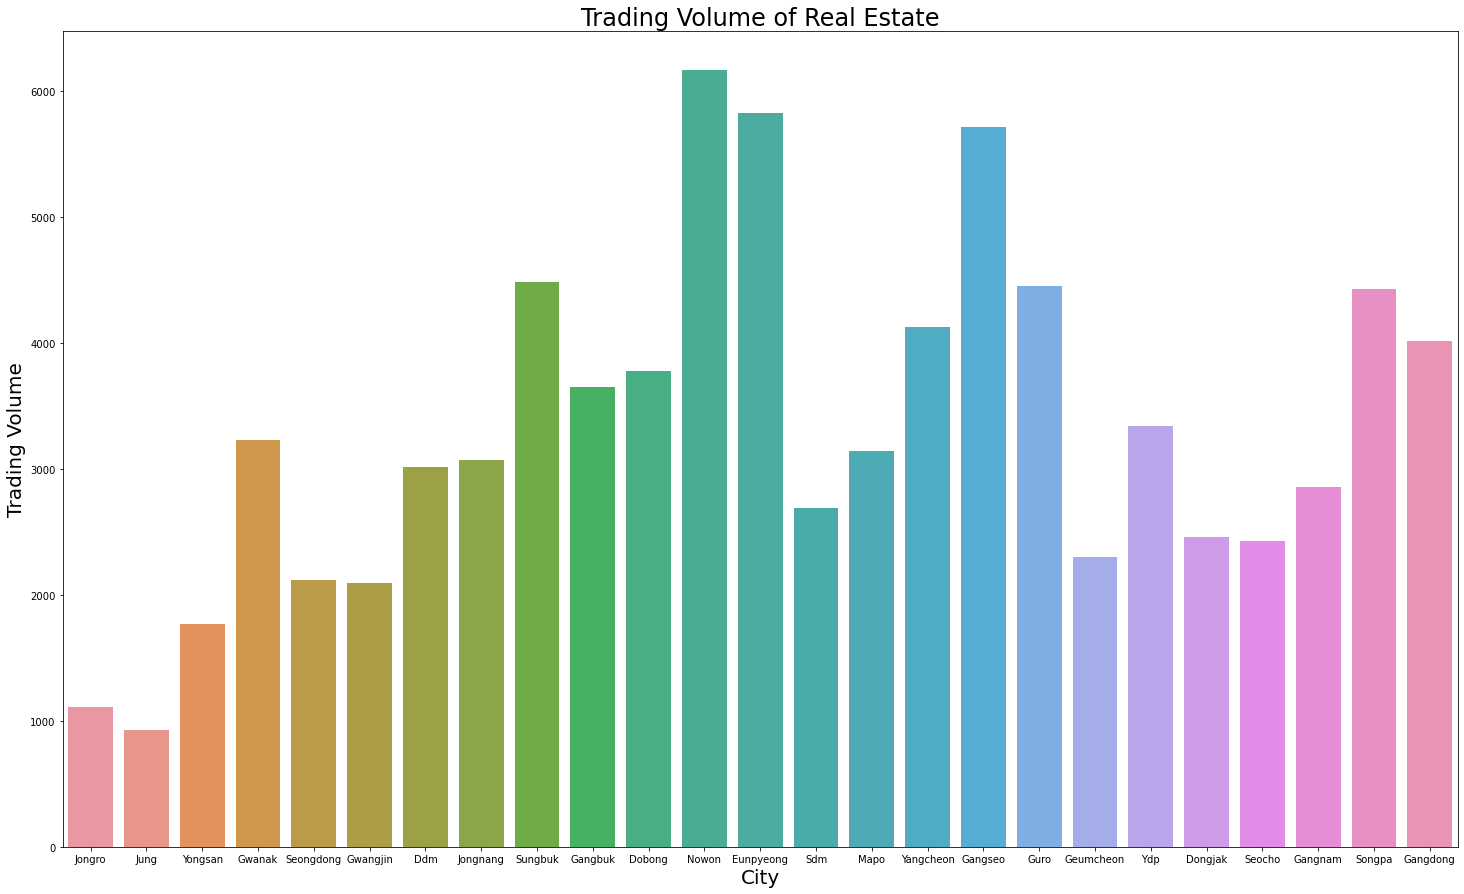

In [44]:
# Column, Bar 차트 제작
import matplotlib.pyplot as plt
import seaborn as sbn
plt.figure(figsize = (25,15))

seoul = sbn.countplot('City', data = sp)
seoul.set_title('Trading Volume of Real Estate', fontsize = 24)
seoul.set_xlabel('City', fontdict = {'size':20})
seoul.set_ylabel('Trading Volume', fontdict = {'size':20})
plt.show()
